In [1]:
import json
import os
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_list = []

path = "/Users/nickbatarilo/Desktop/lyric_anal/lyrics/json"
for filename in os.listdir(path):
    if(os.path.isfile("/Users/nickbatarilo/Desktop/lyric_anal/lyrics/json/" + filename)):
        with open("/Users/nickbatarilo/Desktop/lyric_anal/lyrics/json/" + filename) as json_file:
            if(filename.endswith(".json")):
                data = json.load(json_file)
                title = data['songs'][0]['title']
                album = data['songs'][0]['album']
                year = data['songs'][0]['year']
                lyrics = data['songs'][0]['lyrics']
                data_list.append([title,album,year,lyrics])
                
columns = ['title', 'album', 'year', 'lyrics']
df = pd.DataFrame(data_list, columns = columns)

In [3]:
df.head()

,title,album,year,lyrics
0,Buried Alive (Interlude),Take Care,2011-11-15,[Intro: Kendrick Lamar]\nIf you was in a pine ...
1,Good Ones Go (Interlude),Take Care,2011-11-15,"[Intro]\nOh yeah\nOh yeah, oh yeah, oh\nOh yea..."
2,Separate LivesVer,None,None,"Verse:\nYeah yeah uh\nI'm feelin' you, gaurant..."
3,Keep the Family Close,Views,2016-04-29,[Intro]\nIt's a little chilly out there\nHow y...
4,Take You Down (Freestyle),None,None,(Intro)\nDrake Talking/ad-libing:\nIts Young M...


In [4]:
df.album.unique()

array(['Take Care', None, 'Views', 'Thank Me Later', 'Scorpion',
       'Heartbreak Drake', 'Born Successful', 'Comeback Season',
       'Nothing Was the Same', 'More Life', 'Room for Improvement',
       'King Soulja II', 'What a Time to Be Alive ',
       'If You’re Reading This It’s Too Late', 'Care Package',
       'So Far Gone', 'Young Sweet Jones 2', 'J.U.S.T.I.C.E. For All',
       'So Far Gone - EP', 'Back 2 The Throne',
       'The Best in the World Pack', 'Young Money: Rise Of An Empire',
       'NBA 2K16 Soundtrack', 'Shock Value II', 'Scary Hours'],
      dtype=object)

In [5]:
tk_df = df[df['album'] == 'Take Care']

In [6]:
tk_df

,title,album,year,lyrics
0,Buried Alive (Interlude),Take Care,2011-11-15,[Intro: Kendrick Lamar]\nIf you was in a pine ...
1,Good Ones Go (Interlude),Take Care,2011-11-15,"[Intro]\nOh yeah\nOh yeah, oh yeah, oh\nOh yea..."
36,HYFR,Take Care,2012-04-24,[Intro: Drake]\nGotta do what I gotta do\n\n[V...
38,Practice,Take Care,2011-11-15,"[Intro]\nYeah, Cash money shit\nCash money shi..."
50,Make Me Proud,Take Care,2011-10-16,[Verse 1: Drake]\nI like a woman with a future...
106,Take Care,Take Care,2011-11-15,[Chorus: Rihanna]\nI know you've been hurt by ...
124,Shot for Me,Take Care,2011-11-15,"[Produced by Noah ""40"" Shebib]\n\n[Verse 1]\nI..."
136,Look What You’ve Done,Take Care,2011-11-15,"[Produced by Chase N. Cashe and Noah ""40"" Sheb..."
156,Hate Sleeping Alone,Take Care,2011-11-15,"[Verse 1]\nShe says ""kiss me like you miss me,..."
171,Under Ground Kings,Take Care,2011-11-11,[Produced by T-Minus and 40]\n\n[Intro]\nYeah\...


In [7]:
text = " ".join(lyrics for lyrics in tk_df.lyrics)
print ("There are {} words in the combination of all lyrics.".format(len(text)))
stopwords = set(STOPWORDS)
new_words =open("/Users/nickbatarilo/Desktop/lyric_anal/stopwords.txt").read().split()
new_stopwords=stopwords.union(new_words)

There are 64827 words in the combination of all lyrics.


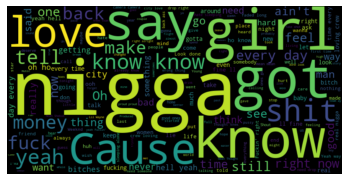

In [8]:
wordcloud = WordCloud(width = 800, height = 400, stopwords = new_stopwords).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
wordcloud.to_file("Take_Care.png")

In [10]:
#Scorpion Wordcloud
scorpion_df = df[df['album'] == 'Scorpion']
scorpion_df

,title,album,year,lyrics
12,Talk Up,Scorpion,2018-06-29,"[Intro: Drake]\nDJ Paul\nTWhy\nAyy, ayy\nLot o..."
21,Summer Games,Scorpion,2018-06-29,[Chorus]\nI think you're changin' your mind\nS...
40,Nonstop,Scorpion,2018-06-29,"[Intro: Lil Juice]\nTay Keith, fuck these nigg..."
44,God’s Plan,Scorpion,2018-01-19,[Intro]\nAnd they wishin' and wishin' and wish...
58,March 14,Scorpion,2018-06-29,"[Intro]\nHere we go, yeah\n\n[Verse]\nYesterda..."
61,After Dark,Scorpion,2018-06-29,"[Intro: Static Major]\nHaha, haha\nYeah, ayy (..."
64,8 Out of 10,Scorpion,2018-06-29,[Intro: Drake]\nToo rich for who? Y'all just g...
90,Ratchet Happy Birthday,Scorpion,2018-06-29,[Chorus: Drake & PARTYNEXTDOOR]\nIt's your fuc...
117,Nice For What,Scorpion,2018-04-06,[Intro: Big Freedia]\nI wanna know who mothafu...
137,Survival,Scorpion,2018-06-29,[Intro]\nI been waitin' on this\nYeah\n\n[Vers...


In [11]:
text = " ".join(lyrics for lyrics in scorpion_df.lyrics)
print ("There are {} words in the combination of all lyrics.".format(len(text)))
stopwords = set(STOPWORDS)
new_words =open("/Users/nickbatarilo/Desktop/lyric_anal/stopwords.txt").read().split()
new_stopwords=stopwords.union(new_words)

There are 59174 words in the combination of all lyrics.


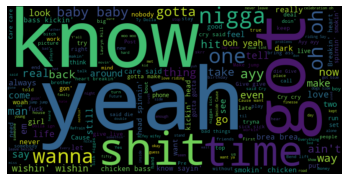

In [12]:
wordcloud = WordCloud(width = 800, height = 400, stopwords = new_stopwords).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
wordcloud.to_file("Scorpion.png")